# The Weighted Mean and the Median

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [2]:
import pandas as pd

In [3]:
houses = pd.read_table("AmesHousing_1.txt")

In [4]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
houses['SalePrice'].mean()

180796.0600682594

In [6]:
houses_per_year = pd.DataFrame()

In [7]:
houses_per_year['Year'] = ['2006', '2007', '2008', '2009', '2010']

In [8]:
houses_per_year['Mean Price'] = [181761.648000, 185138.207493, 178841.750804, 181404.567901, 172597.598240]

In [9]:
houses_per_year['Houses Sold'] = [625, 694, 622, 648, 341]

In [10]:
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [11]:
mean_new=houses_per_year['Mean Price'].mean()

mean_original = houses['SalePrice'].mean()

difference = mean_original - mean_new
difference

847.3055806593911

Since we have different number of houses sold each year, the mean of the Mean Price column is not equal to that of the SalePrice column. 

We now take different number of sales in each year into account:

In [14]:
houses_per_year['sum_per_year'] = houses_per_year['Mean Price'] * houses_per_year['Houses Sold']

all_sums_together = houses_per_year['sum_per_year'].sum()

total_n_houses = houses_per_year['Houses Sold'].sum()

weighted_mean = all_sums_together / total_n_houses

mean_original = houses['SalePrice'].mean()

difference = round(mean_original, 10) - round(weighted_mean, 10)
difference

2.7997884899377823e-08

### The Weighted Mean

In [26]:
def weightet_mean(distribution, weights):
    weighted_sum = []
    l = len(distribution)
    for i in range(0,l):
        weighted_sum.append(distribution[i] * weights[i])
    
    return sum(weighted_sum) / sum(weights)

weighted_mean_function = weightet_mean(houses_per_year['Mean Price'], houses_per_year['Houses Sold'])
weighted_mean_function

180796.0600682314

In [27]:
from numpy import average

weighted_mean_numpy = average(houses_per_year['Mean Price'], weights = houses_per_year['Houses Sold'])
weighted_mean_numpy

180796.0600682314

In [28]:
equal = round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10)
equal

True

### The Median of Open-ended Distributions

In [33]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

median1 = 23
median2 = 55
median3 = 32

### Distributions with even cardinalities

In [37]:
rooms_above_ground = houses['TotRms AbvGrd'].copy()
rooms_above_ground = rooms_above_ground.replace({'10 or more':'10'})
rooms_above_ground = rooms_above_ground.astype(int)
rooms_above_ground = rooms_above_ground.sort_values()

middle_indices = [int((len(rooms_above_ground) / 2)), int((len(rooms_above_ground) / 2 + 1))]

middle_values = rooms_above_ground.iloc[middle_indices] 

median = middle_values.mean()
median

6.0

### Median is a robust statistic

Since the median is so resistant to changes in the data, it's classified as a **resistant or robust statistic**.

In [38]:
import matplotlib.pyplot as plt

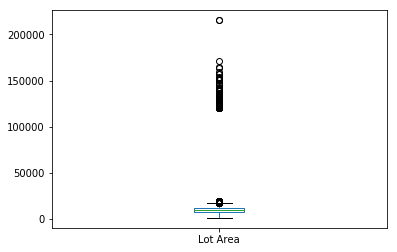

In [40]:
houses['Lot Area'].plot.box()

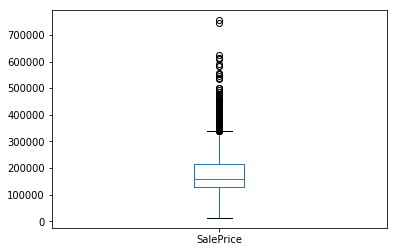

In [41]:
houses['SalePrice'].plot.box()

The Lot Area and SalePrice variables have outliers!

In [42]:
lot_mean = houses['Lot Area'].mean()
lot_mean

13117.205119453925

In [43]:
sale_mean = houses['SalePrice'].mean()
sale_mean

180796.0600682594

In [44]:
lot_med = houses['Lot Area'].median()
lot_med

9436.5

In [45]:
sale_med = houses['SalePrice'].median()
sale_med

160000.0

In [46]:
lotarea_difference = lot_mean - lot_med
lotarea_difference

3680.7051194539254

In [47]:
saleprice_difference = sale_mean-sale_med
saleprice_difference

20796.060068259394

### The Median for Ordinal variables

In [48]:
houses['Overall Cond'].value_counts().sort_index()

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64

In [49]:
mean = houses['Overall Cond'].mean()
mean

5.563139931740614

In [50]:
median = houses['Overall Cond'].median()
median

5.0

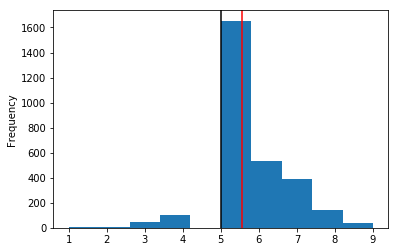

In [55]:
houses['Overall Cond'].plot.hist() 
plt.axvline(mean, c = 'red')
plt.axvline(median, c = 'black')
plt.show()

In this example, the Mean is more representative of the ordinal variable "overall condition"!